In [1]:
import mdsine2 as md2
from mdsine2.names import STRNAMES
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
from pathlib import Path
# ACS98: installed scikit-learn into mdsine2 conda env

[DEBUG] Using default logger (stdout, stderr).


# McNulty et al., 2013

In [2]:
output_dir = Path('mcnulty-results')

In [125]:
mcnulty = md2.dataset.parse(name='mcnulty', \
                            metadata='mcnulty-datasets/metadata.tsv', \
                            taxonomy='mcnulty-datasets/taxonomy_test.tsv', \
                            reads='mcnulty-datasets/reads_rounded.tsv', \
                            qpcr='mcnulty-datasets/qpcr_healthy.tsv', \
                            perturbations='mcnulty-datasets/perturbations.tsv', sep='\t')

[INFO] TaxaSet parsng new taxonomy table. Resetting
[DEBUG] Reseting perturbations


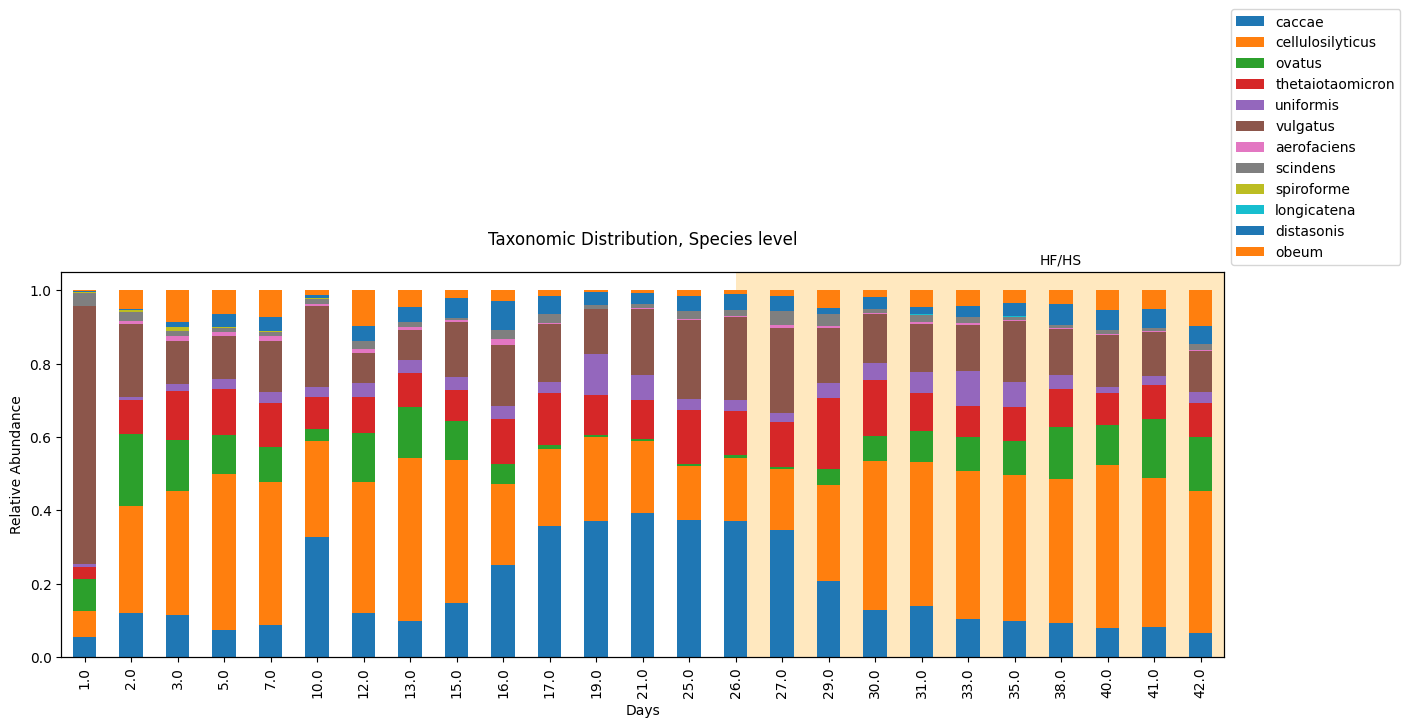

In [49]:
# Plot the taxa abundances at the phylum level for subject `1`
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(111)
md2.visualization.taxonomic_distribution_over_time(mcnulty['1'], taxlevel='species', label_formatter='%(species)s', ax=ax)
plt.show()

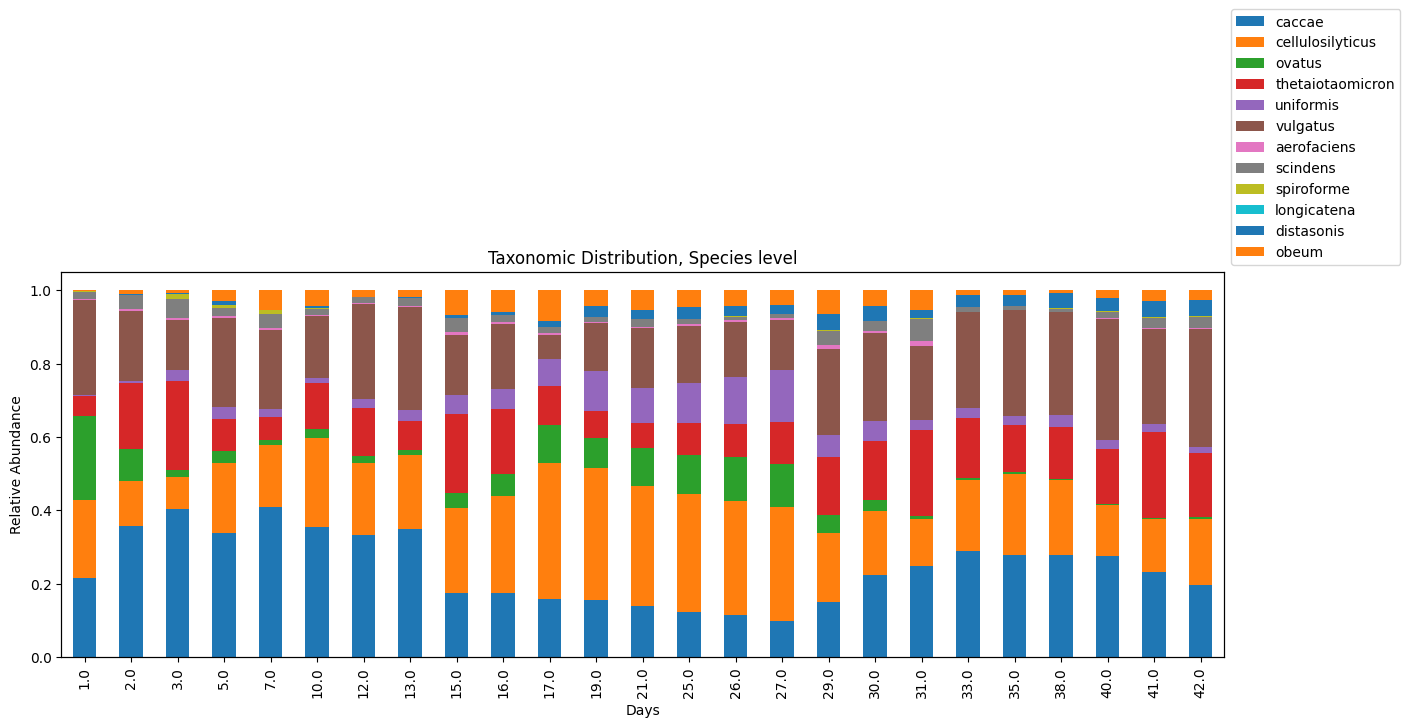

In [50]:
# Plot the taxa abundances at the phylum level for subject `9`
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(111)
md2.visualization.taxonomic_distribution_over_time(mcnulty['9'], taxlevel='species', label_formatter='%(species)s', ax=ax)
plt.show()

In [51]:
params = md2.config.NegBinConfig(
    seed=0, burnin=100, n_samples=200,
    checkpoint=100, 
    basepath=str(output_dir / "negbin"))

In [52]:
mcmc_negbin = md2.negbin.build_graph(
    params=params, 
    graph_name=mcnulty.name, 
    subjset=mcnulty)

[DEBUG] Available subjects: 1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
[DEBUG] Subject 1, available qpcr: 1.0,2.0,3.0,5.0,7.0,10.0,12.0,13.0,15.0,16.0,17.0,19.0,21.0,25.0,26.0,27.0,29.0,30.0,31.0,33.0,35.0,38.0,40.0,41.0,42.0


KeyError: 0